In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
df=pd.read_excel("../data/PM_ML_Data_Final.xlsx")

In [6]:
df.head()

,TestID,WNRD,WNVol,WNNCD,Class
0,1,0.000120,0.012339,0.008525,Similar
1,2,0.000120,0.011953,0.008375,Similar
2,3,0.000196,0.007618,0.004438,Similar
3,4,0.000197,0.007452,0.004424,Similar
4,5,0.000162,0.012785,0.009120,Similar


In [7]:
df=pd.read_excel("../data/PM_ML_Data_Final.xlsx",index_col="TestID")

In [8]:
df.head()

,WNRD,WNVol,WNNCD,Class
TestID,,,,
1,0.000120,0.012339,0.008525,Similar
2,0.000120,0.011953,0.008375,Similar
3,0.000196,0.007618,0.004438,Similar
4,0.000197,0.007452,0.004424,Similar
5,0.000162,0.012785,0.009120,Similar


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
seed=7

In [11]:
X=df.drop('Class', axis=1)
y=df['Class']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=seed)

In [13]:
X_train

,WNRD,WNVol,WNNCD
TestID,,,
415,0.002227,0.105717,0.062179
319,0.198656,0.127894,0.233370
573,0.002356,0.169175,0.120250
506,0.008541,0.089513,0.060240
601,0.000945,0.168636,0.136925
...,...,...,...
580,0.002454,0.114904,0.083363
503,0.007232,0.093650,0.066664
538,0.000882,0.123532,0.086431


In [14]:
X_test

,WNRD,WNVol,WNNCD
TestID,,,
238,0.186641,0.127044,0.224919
564,0.006220,0.098347,0.082061
676,0.006239,0.134682,0.100609
25,0.000435,0.008095,0.005574
205,0.160748,0.140607,0.210533
...,...,...,...
796,0.000386,0.022569,0.016738
189,0.167908,0.161788,0.215418
252,0.185649,0.130624,0.223735


# 결정트리 알고리즘

## 학습 -> 모델

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model=DecisionTreeClassifier(max_depth=5)

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

## 모델 평가

In [18]:
evaluations=model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,evaluations))

              precision    recall  f1-score   support

         Day       0.68      0.49      0.57        35
   Different       1.00      1.00      1.00        80
  Instrument       1.00      0.99      0.99        92
         Lab       1.00      1.00      1.00        13
     Similar       0.77      0.89      0.82        70

    accuracy                           0.91       290
   macro avg       0.89      0.87      0.88       290
weighted avg       0.90      0.91      0.90       290



In [21]:
print(confusion_matrix(y_test,evaluations))

[[17  0  0  0 18]
 [ 0 80  0  0  0]
 [ 0  0 91  0  1]
 [ 0  0  0 13  0]
 [ 8  0  0  0 62]]


In [22]:
print("훈련정확도:{:.3f}".format(model.score(X_train,y_train)))

훈련정확도:0.922


In [23]:
print("예측정확도:{:.3f}".format(model.score(X_test,y_test)))

예측정확도:0.907


In [24]:
print("속성중요도:\n{}".format(model.feature_importances_))

속성중요도:
[0.49130309 0.00977519 0.49892172]


## 데이터 저장하기

In [25]:
X_train.to_csv("../data/PM_Tree_train.csv")

In [26]:
X_train_saved=pd.read_csv("../data/PM_Tree_train.csv")

In [27]:
X_train_saved

,TestID,WNRD,WNVol,WNNCD
0,415,0.002227,0.105717,0.062179
1,319,0.198656,0.127894,0.233370
2,573,0.002356,0.169175,0.120250
3,506,0.008541,0.089513,0.060240
4,601,0.000945,0.168636,0.136925
...,...,...,...,...
671,580,0.002454,0.114904,0.083363
672,503,0.007232,0.093650,0.066664
673,538,0.000882,0.123532,0.086431
674,197,0.167056,0.122953,0.199955


In [28]:
X_train_saved=pd.read_csv("../data/PM_Tree_train.csv",index_col="TestID")

In [29]:
X_train_saved

,WNRD,WNVol,WNNCD
TestID,,,
415,0.002227,0.105717,0.062179
319,0.198656,0.127894,0.233370
573,0.002356,0.169175,0.120250
506,0.008541,0.089513,0.060240
601,0.000945,0.168636,0.136925
...,...,...,...
580,0.002454,0.114904,0.083363
503,0.007232,0.093650,0.066664
538,0.000882,0.123532,0.086431


In [30]:
X_train_saved["Class"]=y_train[:]

In [31]:
X_train_saved

,WNRD,WNVol,WNNCD,Class
TestID,,,,
415,0.002227,0.105717,0.062179,Lab
319,0.198656,0.127894,0.233370,Different
573,0.002356,0.169175,0.120250,Instrument
506,0.008541,0.089513,0.060240,Instrument
601,0.000945,0.168636,0.136925,Instrument
...,...,...,...,...
580,0.002454,0.114904,0.083363,Instrument
503,0.007232,0.093650,0.066664,Instrument
538,0.000882,0.123532,0.086431,Instrument


In [32]:
X_train_saved.to_csv("../data/PM_Tree_train_Class.csv")

## 미지의 데이터 예측하기

In [33]:
un=pd.read_excel("../data/PM_ML_Unknown.xlsx",index_col="TestID")

In [34]:
un

,WNRD,WNVol,WNNCD
TestID,,,
14,0.000206,0.019164,0.012985
70,0.000307,0.008519,0.009125
176,0.192594,0.087238,0.208814
295,0.199662,0.149283,0.246484
382,0.001103,0.047906,0.036669
419,0.002454,0.099070,0.057033
425,0.006560,0.139213,0.094563
723,0.006616,0.149104,0.099622
731,0.000245,0.024575,0.018870


In [35]:
un_prediction=model.predict(un)

In [36]:
un_prediction

array(['Similar', 'Similar', 'Different', 'Different', 'Lab', 'Lab',
       'Instrument', 'Instrument', 'Day', 'Similar'], dtype=object)

In [37]:
un_prediction[0:10]

array(['Similar', 'Similar', 'Different', 'Different', 'Lab', 'Lab',
       'Instrument', 'Instrument', 'Day', 'Similar'], dtype=object)

In [38]:
un["Prediction"]=un_prediction[:]

In [39]:
un

,WNRD,WNVol,WNNCD,Prediction
TestID,,,,
14,0.000206,0.019164,0.012985,Similar
70,0.000307,0.008519,0.009125,Similar
176,0.192594,0.087238,0.208814,Different
295,0.199662,0.149283,0.246484,Different
382,0.001103,0.047906,0.036669,Lab
419,0.002454,0.099070,0.057033,Lab
425,0.006560,0.139213,0.094563,Instrument
723,0.006616,0.149104,0.099622,Instrument
731,0.000245,0.024575,0.018870,Day


In [40]:
un.to_csv("../data/PM_ML_Tree_Unknown_Prediction.csv")

## 결정 트리 그래프 그리기

In [41]:
from IPython.display import Image

In [42]:
import os

IPython 내에서 그래프를 표현하는 소프트웨어인 graphviz 설치과정에 대해 알아보자.
Windows 환경의 최신버전인 graphviz-2.38을 설치하기 위해 https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에 가면
다운로드가 가능한 exe 와 zip 두 가지 종류의 확장자를 가진 파일 중
stable_windows_10_cmake_Release_x64_graphviz-install-2.47.0-win64.exe 파일을 다운로드 한다.
파일을 (기본경로) C:/Program Files 에 설치한다.

In [43]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

ipython 내에서 그래프를 생성할 수 있는 인터페이스 경로를 추가 설정하는 부분이다. 
Graphviz2.47.0 소프트웨어의 bin 폴더가 있는 경로인 C:\Program Files/Graphviz/bin/를
os 모듈 중 경로 구분 기호를 반환하는 함수인 os.pathsep을 이용해, 
환경변수들을 나타내는 사전함수인 s.environ['PATH']에 동적으로 할당해 저장한다.

In [44]:
from sklearn.tree import export_graphviz

In [45]:
import graphviz

In [46]:
feature_names=["WNRD","WNVol","WNNCD"]

In [47]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=["Similar", "Day","Lab","Instrument", "Different"],
                out_file="decision-tree.dot", filled=True)

In [48]:
with open("decision-tree.dot") as f:
      dot_graph = f.read()

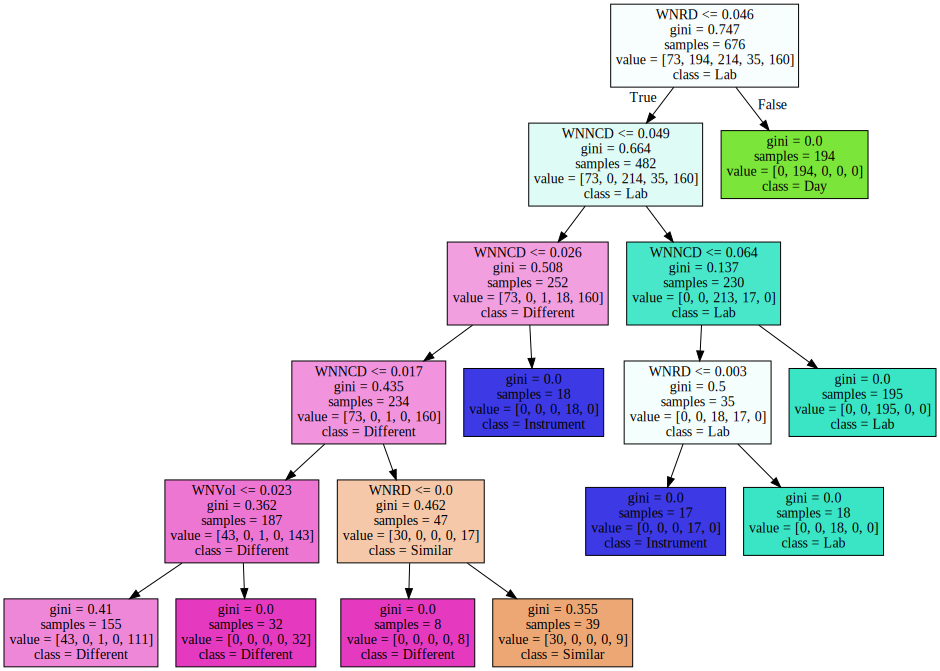

In [49]:
graphviz.Source(dot_graph)

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc=RandomForestClassifier(n_estimators=10,random_state=7)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=7)

In [54]:
rfc_pred=rfc.predict(X_test)

In [55]:
print(confusion_matrix(y_test,rfc_pred))

[[31  0  0  0  4]
 [ 0 80  0  0  0]
 [ 0  0 91  0  1]
 [ 0  0  0 13  0]
 [10  0  0  0 60]]


In [56]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         Day       0.76      0.89      0.82        35
   Different       1.00      1.00      1.00        80
  Instrument       1.00      0.99      0.99        92
         Lab       1.00      1.00      1.00        13
     Similar       0.92      0.86      0.89        70

    accuracy                           0.95       290
   macro avg       0.94      0.95      0.94       290
weighted avg       0.95      0.95      0.95       290



In [57]:
print("훈련정확도:{:.3f}".format(rfc.score(X_train,y_train)))

훈련정확도:0.997


In [58]:
print("예측정확도:{:.3f}".format(rfc.score(X_test,y_test)))

예측정확도:0.948


In [60]:
print("속성중요도:\n{}".format(model.feature_importances_)) ##의사결정트리

속성중요도:
[0.49130309 0.00977519 0.49892172]


In [61]:
print("속성중요도:\n{}".format(rfc.feature_importances_)) ##랜덤포리스트

속성중요도:
[0.38898546 0.31903106 0.29198348]


In [62]:
!pip install seaborn

In [63]:
import seaborn as sns

In [64]:
feature_names

['WNRD', 'WNVol', 'WNNCD']

C:\Users\jksuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Features')

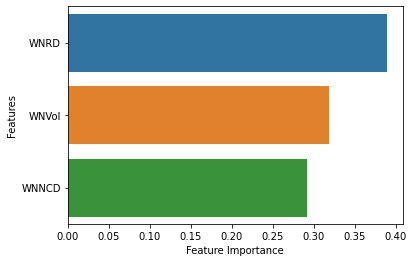

In [65]:
plt.figure()
sns.barplot(rfc.feature_importances_,feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")

C:\Users\jksuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Features')

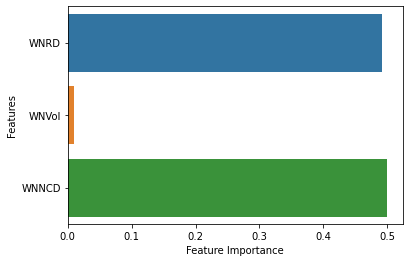

In [66]:
plt.figure()
sns.barplot(model.feature_importances_,feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")

## Adaaboost

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
abc=AdaBoostClassifier(n_estimators=10,random_state=7)

In [70]:
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [71]:
abc_pred=abc.predict(X_test)

In [73]:
print(confusion_matrix(y_test,abc_pred))

[[ 0  0  0  0 35]
 [ 0 80  0  0  0]
 [ 0  0 91  0  1]
 [ 0  0 13  0  0]
 [ 0  0  0  0 70]]


In [74]:
print(classification_report(y_test,abc_pred))

              precision    recall  f1-score   support

         Day       0.00      0.00      0.00        35
   Different       1.00      1.00      1.00        80
  Instrument       0.88      0.99      0.93        92
         Lab       0.00      0.00      0.00        13
     Similar       0.66      1.00      0.80        70

    accuracy                           0.83       290
   macro avg       0.51      0.60      0.54       290
weighted avg       0.71      0.83      0.76       290



C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print("훈련정확도:{:.3f}".format(abc.score(X_train,y_train)))

훈련정확도:0.839


In [76]:
print("예측정확도:{:.3f}".format(abc.score(X_test,y_test)))

예측정확도:0.831


In [77]:
print("속성중요도:\n{}".format(abc.feature_importances_)) ##아다부스트

속성중요도:
[0.6 0.  0.4]


C:\Users\jksuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Features')

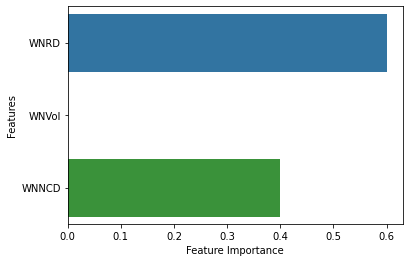

In [78]:
plt.figure()
sns.barplot(abc.feature_importances_,feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")